In [4]:
from polygon import RESTClient
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt

[]
[]


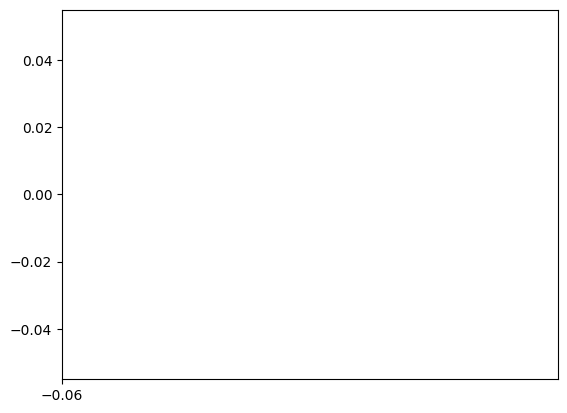

In [5]:
client = RESTClient("InxdvvQ5aFMwk5xWUpJUCpe8YHcimh8d")
ticker = "NVDA"
day = "2024-04-16"
aggs = client.get_aggs(ticker, 1, "minute", day, day)
x_close = []
y_close = []
for i in range(0, len(aggs), 1):
  agg = aggs[i] 
  x_close.append(datetime.fromtimestamp(agg.timestamp // 1000).time().strftime("%H:%M"))
  y_close.append(agg.close)

print(x_close)
print(y_close)

plt.plot(x_close, y_close)

#unclog by 30, delete later
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::30])
plt.show()

class MovingAverage:
  def __init__(self, typ, period):
    self.period = period
    self.typ = typ
    self.data = []
    self.avg = -1 # needs updating - at least 1 day(s) of data required
  
  def update(self, new_delta):
    if self.typ == "gain" and new_delta < 0:
      new_delta = 0
    elif self.typ == "loss" and new_delta > 0:
      new_delta = 0
    self.data.append(abs(new_delta))
    if len(self.data) > self.period:
      self.data.pop(0)
    self.avg = sum(self.data) / len(self.data)
  

class RelativeStrengthIndex:
  def __init__(self, period=14):
    self.period = period
    self.last = -1
    self.gain_avg = MovingAverage("gain", period)
    self.loss_avg = MovingAverage("loss", period)
    self.rsi = -1 # needs updating - more than [period] day(s) of data required
    self.count = 0
  
  def update(self, new_data_point, time=""):
    if self.last >= 0:
      self.gain_avg.update(new_data_point - self.last)
      self.loss_avg.update(new_data_point - self.last)
    self.last = new_data_point
    self.count += 1
    if self.count > self.period:
      self.rsi = 100 - (100 / (1 + self.gain_avg.avg / self.loss_avg.avg))


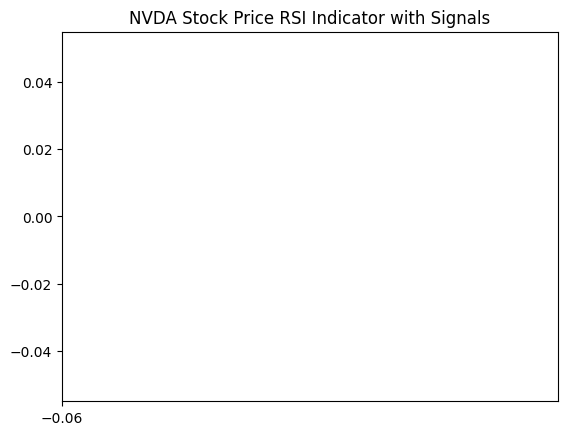

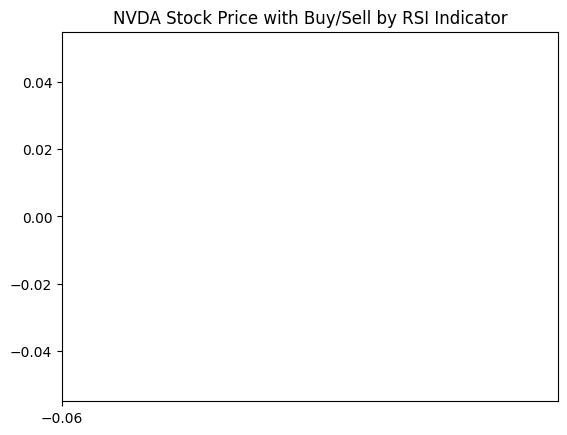

In [6]:
#RSI execution

data_x = []
data_y = []
low = []
high = []
rsi = RelativeStrengthIndex()
last_rsi = -1
buys = []
sells = []
for time, point in zip(x_close, y_close):
  rsi.update(point, time)
  if rsi.count > rsi.period:
    if last_rsi < 0:
      last_rsi = rsi.rsi
    data_x.append(time)
    data_y.append(rsi.rsi)
    low.append(30)
    high.append(70)
    if last_rsi < 30 and rsi.rsi >= 30:
      buys.append(time)
    if last_rsi > 70 and rsi.rsi <= 70:
      sells.append(time)
    last_rsi = rsi.rsi

plt.title(ticker + " Stock Price RSI Indicator with Signals")
plt.plot(data_x, data_y)
plt.plot(data_x, low)
plt.plot(data_x, high)
for buy in buys:
  plt.axvline(x=buy, color="green")
for sell in sells:
  plt.axvline(x=sell, color="red")
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::30])
plt.show()

plt.plot(x_close, y_close)
plt.title(ticker + " Stock Price with Buy/Sell by RSI Indicator")
for buy in buys:
  plt.axvline(x=buy, color="green")
for sell in sells:
  plt.axvline(x=sell, color="red")
ax = plt.gca()
ax.set_xticks(ax.get_xticks()[::30])
plt.show()

In [7]:
#Aggregate Transactions

transaction_times = sorted(buys + sells)
#print(transaction_times)
transactions = []
for t in transaction_times:
    price = y_close[x_close.index(t)]
    if t in buys:
        transactions.append([t, price, "Buy"])
    else:
        transactions.append([t, price, "Sell"])


#Execute Transactions through simulation
print("Running Simulation for RSI with", ticker, "on", day)

print("Number of Transactions: ", len(transactions))
print("Open Price, Close Price: ", y_close[0], y_close[-1])
cash = 100000
shares = 1000
print("Cash and Shares: ", cash, shares)
portfolio_val_s = cash + y_close[0]*shares
print("BOD portfolio: ", portfolio_val_s)
amt = cash * 0.2

for order in transactions:
    if order[2] == "Buy":
        cash -= amt
        shares += amt/order[1]
    else:
        cash += amt
        shares -= amt/order[1]

print("Cash and Shares: ", cash, shares)
portfolio_val_e = cash + y_close[-1]*shares
print("EOD portfolio: ", portfolio_val_e)
print("Profit: ", portfolio_val_e - portfolio_val_s, (portfolio_val_e - portfolio_val_s)/portfolio_val_s * 100, "%")
    


Running Simulation for RSI with NVDA on 2023-01-01
Number of Transactions:  0


IndexError: list index out of range